# Projekt car

## 1 Lernziele
Die Studierenden lernen
- Grafikbefehle anzuwenden
- Schaubilder von Funktionen und parametrisierten Kurven zu erstellen
- Vektoren und Matrizen zu erzeugen und damit zu rechnen
- Lineare Gleichungssysteme zu lösen
- Interpolationspolynome durch vorgegebene Punkte zu ermitteln
- Transformationsmatrizen in der Ebene anzuwenden

## 2 Bibliotheken
Eines der Grundkonzepte von Python ist die Verwendung spezieller Bibliotheken für spezielle Aufgaben.
Für Berechnungen mit Vektoren und Matrizen wird meistens die Bibliothek `numpy` verwendet und für Grafiken die Bibliothek `matplotlib`.
Die Bibliothek `numpy` und das API `pyplot` der `matplotlib` orientieren sich an der Syntax von Matlab.
Für `pyplot` ist die Abkürzung `plt` und für `numpy` die Abkürzung `np` üblich.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Die Funktion `IFrame()` wird zum Anzeigen von Grafiken aus Dateien verwendet.

In [2]:
from IPython.display import IFrame

## 3 Aufgabenstellung
Die abgebildete Grafik soll erstellt werden.

In [3]:
IFrame('car5.png', width=600, height=330)

## 4 Vorgehensweise
Die Vorgehensweise kann in den folgenden Schritten erfolgen:
- Grafik mit Gitterlinien
- Linien für Boden und Heck
- Räder
- Dach
- Profilkurve
- Transformation
- Animation (optional)

### 4.1 Grafik mit Gitterlinien
Zunächst werden die Werte für den Bereich der $x$- und $y$-Werte festgelegt.
Dabei kann man in Python die Mehrfachzuweisung mit durch Kommata getrennten Elementen verwenden.   

In [4]:
x_min, x_max, y_min, y_max = -20.0, 20.0, -10.0, 12.0

Nun wird ein Fenster vom Typ `figure` und darin ein Achsenkreuz vom Typ `axes` erzeugt.
Die Größe des Fensters wird auf den Bereich der $x$- und $y$-Werte angepasst.
Mit der Funktion `subplots()` ist es auch möglich, mehrere Achsenkreuze in einem Fenster zu platzieren.

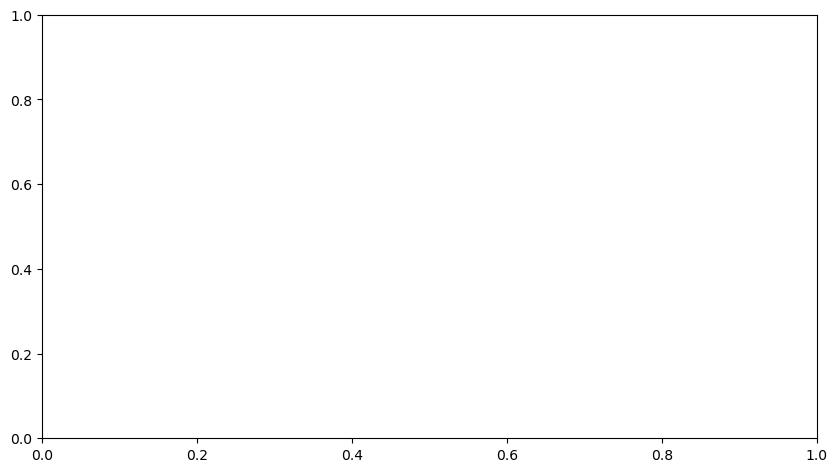

In [5]:
fig, ax = plt.subplots(figsize=((x_max-x_min)/4,(y_max-y_min)/4))

Die Funktion `set_aspect('equal')` stellt sicher, dass die Skalierung der $x$- und $y$-Werte im Verhältnis $1:1$ erfolgt.
Dadurch werden die Räder später als Kreis und nicht als Ellipse dargestellt.

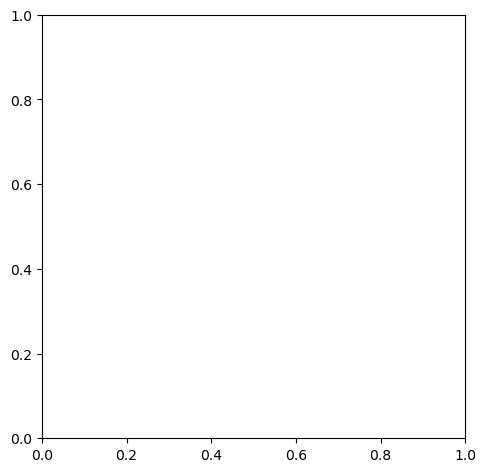

In [6]:
ax.set_aspect('equal')
display(fig)

Standardmäßig verläuft der Bereich der $x$- und $y$-Werte zwischen $0.0$ und $1.0$.
Er kann durch die Funktion `axis()` angepasst werden.
Die Funktion `display()` zeigt das veränderte Fenster an.

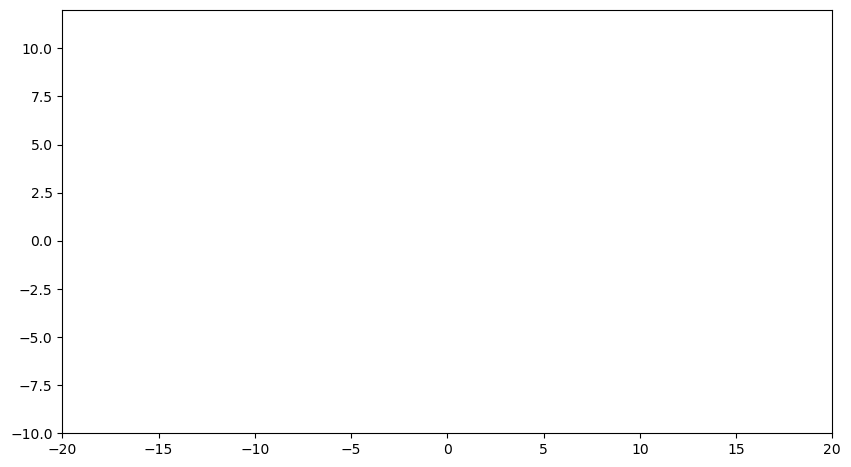

In [9]:
ax.axis([x_min,x_max,y_min,y_max])
display(fig)

Die Beschriftung der Achsen wird durch die Funktionen `set_xticks()` und `set_yticks()` angepasst.
Die Zahlenwerte für die Positionen der Achsenbeschriftungen werden durch einen `numpy`-Vektor festgelegt.
Die Vektoren werden durch die Funktion `arange()` erzeugt.

<div class="alert alert-block alert-danger">
    
<b>Merke</b>
    
Mit der Funktion `arange(start,stop,step)` aus der Bibliothek `numpy` lassen sich Sequenzen von Zahlen, die bei `start` beginnen, vor `stop` enden und eine Schrittweite `step` besitzen erzeugen.
Ähnliche Möglichkeiten bietet die Funktion `linspace(start,stop,num)`.
    

- https://numpy.org/devdocs/reference/generated/numpy.arange.html
- https://numpy.org/devdocs/reference/generated/numpy.linspace.html

x_ticks =  [-20. -18. -16. -14. -12. -10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.
   8.  10.  12.  14.  16.  18.  20.]
y_ticks =  [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.  12.]


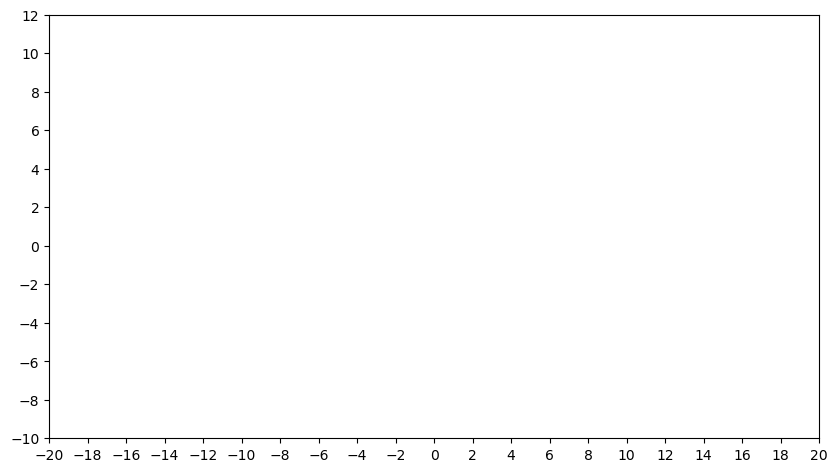

In [18]:
x_ticks = np.arange(x_min,x_max+1,2)
print('x_ticks = ',x_ticks)
ax.set_xticks(x_ticks)
y_ticks = np.arange(y_min,y_max+1,2)
print('y_ticks = ',y_ticks)
ax.set_yticks(y_ticks)
display(fig)

Die Gitterlinien können durch die Funktion `grid()` eingeblendet werden.

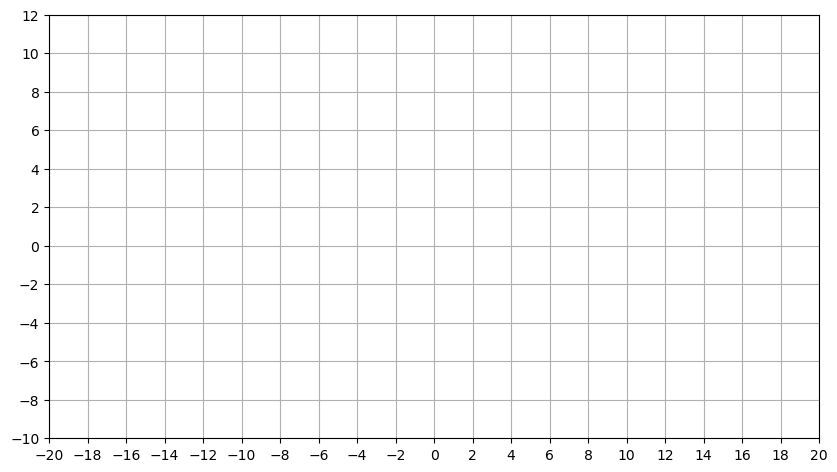

In [20]:
ax.grid(True)
display(fig)

Eine bessere optische Wirkung lässt sich erzielen, in dem man zusätzlich zu dem sogenannten `major` Gitter auch noch das sogenannte `minor` Gitter, mit geringeren Farbintensitäten, einblendet.

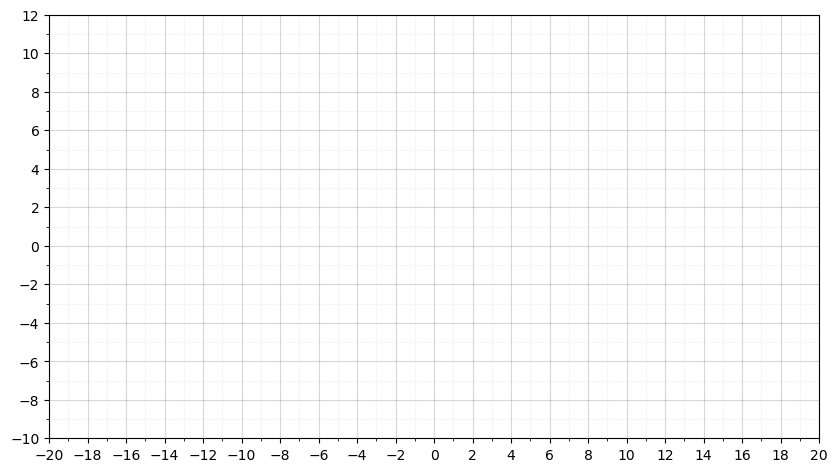

In [23]:
ax.set_xticks(np.arange(x_min,x_max+1),minor=True)
ax.set_yticks(np.arange(y_min,y_max+1),minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
display(fig)

### 4.2 Linien für Boden und Heck

<div class="alert alert-block alert-info">
    
### Aufgabe 1

Ergänzen Sie die Grafik durch die Linien für Boden und Heck des Fahrzeugs.   
</div>

In [28]:
IFrame('car1.png', width=600, height=330)

<div class="alert alert-block alert-danger">
    
<b>Merke</b>
    
Mit der Funktion `plot(x,y,...)` aus der Bibliothek `matplotlib` lassen sich die Punkte mit den $x$- und $y$-Koordinaten grafisch darstellen.
Die Punkte werden entweder durch gerade Linien verbunden oder einzeln durch Symbole dargestellt.
Unterbrochene Linien lassen sich durch Einfügen von `numpy.nan` erzeugen.

- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
    
</div>

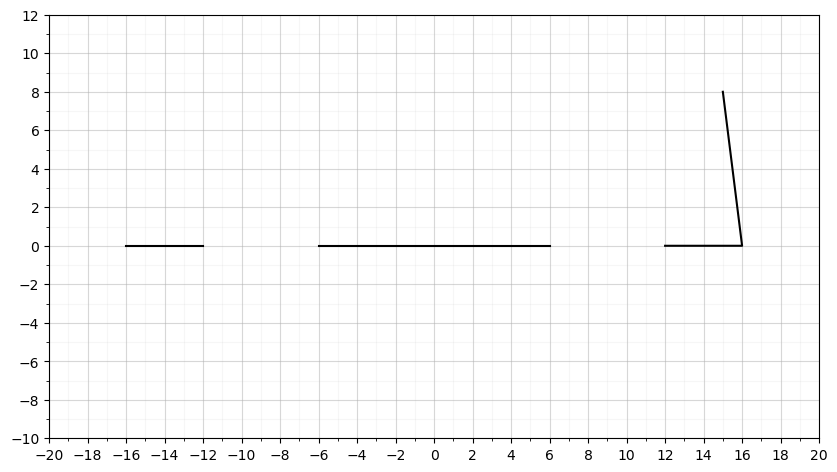

In [30]:
ax.plot([-16,-12],[0,0], color='black', linestyle= '-')
ax.plot([-6,6],[0,0], color='black', linestyle= '-')
ax.plot([12,16,15],[0,0,8], color='black', linestyle= '-')

display(fig)


### 4.3 Räder
Die Räder werden durch zwei Kreise mit Radius $r=3$ dargestellt.
Ein Kreis um den Ursprung mit Radius $r$ besitzt die mathematische Darstellung

$$
	\mathbf{c}(t) =
	\left(
		\begin{array}{c}
			r \cos (t) \\
			r \sin (t) \\
		\end{array}
	\right),
	\quad
	t \in [0, 2 \pi].
$$

Wenn das Intervall $[0, 2 \pi]$ gleichmäßig in $n$ Abschnitte unterteilt wird

$$
	t_0 = 0, \quad t_1 = \frac{2 \pi}{n}, \quad \ldots, \quad t_n = 2 \pi
$$

und die entsprechenden Punkte durch gerade Strecken verbunden werden, dann entsteht ein $n$-Eck.
Für genügend groß gewähles $n$ wirkt das $n$-Eck in der grafischen Darstellung wie ein Kreis.
Zur Darstellung der beiden Räder muss das $n$-Eck entsprechend in $x$-Richtung verschoben werden.

<div class="alert alert-block alert-info">
    
### Aufgabe 2

Ergänzen Sie die Grafik durch die Rädes des Fahrzeugs.   
</div>

In [35]:
IFrame('car2.png', width=600, height=330)

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

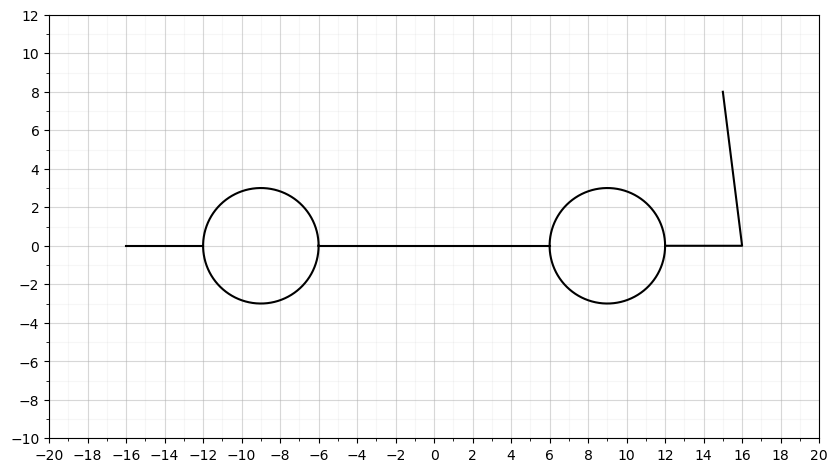

In [36]:
#
# Ergänzen Sie bitte hier die Python Befehle für Aufgabe 2!
#t-werte:
t = np.linspace(0.0,2*np.pi,100)
print(t)
r = 3
x = r * np.cos(t)
y = r * np.sin(t)
ax.plot(x-9,y,'-k')
ax.plot(x+9,y,'-k')
display(fig)











# Neuer Abschnitt

### 4.4 Dach
Das Dach wird durch eine Parabel, die durch die drei rot markierten Punkte mit den Koordinaten $(-9,5)$, $(0,9)$ und $(12,7)$ geht, beschrieben.
Die Parabel kann als Schaubild eines Polynoms vom Grad $2$ in der Form

$$
	p(x) = a_0 + a_1 x + a_2 x^2, \quad x \in [-9, 12],
$$

dargestellt werden.
Die Koeffizienten $a_0$, $a_1$ und $a_2$ berechnet man mithilfe eines linearen Gleichungssystems.
Dazu setzt man die $x$- und $y$-Werte der Punkte in die Gleichung des Polynoms ein und löst das lineare Gleichungssystem in Matrixform:

$$
\begin{array}{ccc}
	a_0 + a_1 \cdot (-9) + a_2 \cdot (-9)^2 & = & 5 \\
	a_0 + a_1 \cdot (\hphantom{-}0) + a_2 \cdot (\hphantom{-}0)^2 & = & 9 \\
	a_0 + a_1 \cdot (\,12) + a_2 \cdot (\,12)^2 & = & 7 \\
\end{array}
\quad \Longleftrightarrow \quad
\underbrace{
\left[
	\begin{array}{ccc}
		1 & -9 & (-9)^2 \\
		1 & \hphantom{-}0 & (\hphantom{-}0)^2 \\
		1 & \,12 & (\,12)^2 \\
	\end{array}
\right]
}_{\displaystyle \mathbf{A}}
\cdot
\underbrace{
\left[
	\begin{array}{c}
		a_0 \\
		a_1 \\
		a_2
	\end{array}
\right]
}_{\displaystyle \mathbf{a}}
=
\underbrace{
\left[
	\begin{array}{c}
		5 \\
		9 \\
		7
	\end{array}
\right]
}_{\displaystyle \mathbf{y}}
$$

<div class="alert alert-block alert-danger">
    
<b>Merke</b>
    
Informationen zum Lösen linearer Gleichungssysteme mit Python finden Sie in dem Jupyter Notebook `linear_system.ipynb` im Moodle-Kurs Python unter der Rubrik `Examples`.
    
</div>

<div class="alert alert-block alert-info">
    
### Aufgabe 3

Ergänzen Sie die Grafik durch das Dach des Fahrzeugs.   
</div>

In [44]:
IFrame('car3.png', width=600, height=330)

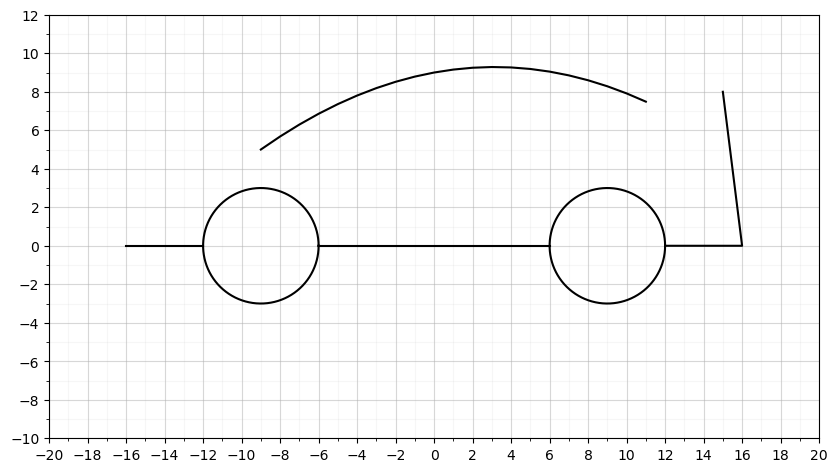

[ 9.          0.18253968 -0.02910053]


In [46]:
#
# Ergänzen Sie bitte hier die Python Befehle für Aufgabe 4!
#

import numpy as np

A=np.array([[1.0,-9.0,81.0],[1.0,0.0,0.0],[1.0,12.0,144.0]])

b=np.array([5.0,9.0,7.0])

Koeffiz= np.linalg.solve(A,b)

a0, a1, a2= Koeffiz

x= np.arange (-9,12,1)

y= a0 + a1*x +a2*x**2

ax.plot(x,y,'-k')

display(fig)

print(Koeffiz)

### 4.5 Profilkurve
Die Profilkurve ermittelt man im Prinzip genau gleich wie die Parabel für das Dach.
Da die Kurve durch sechs Punkte geht, benötigen wir ein Polynom vom Grad $5$

$$
	p(x) = b_0 + b_1 x + b_2 x^2 + b_3 x^3 + b_4 x^4 + b_5 x^5, \quad x \in [-16, 15].
$$

Das lineare Gleichungssystem in Matrixform zur Berechnung der Koeffizienten $b_0$, $b_1$, $b_2$, $b_3$, $b_4$ und $b_5$ lautet dann

$$
\underbrace{
\left[
	\begin{array}{cccccc}
		1 & x_1 & x_1^2 & x_1^3 & x_1^4 & x_1^5\\
		1 & x_2 & x_2^2 & x_2^3 & x_2^4 & x_2^5\\
		1 & x_3 & x_3^2 & x_3^3 & x_3^4 & x_3^5\\
		1 & x_4 & x_4^2 & x_4^3 & x_4^4 & x_4^5\\
		1 & x_5 & x_5^2 & x_5^3 & x_5^4 & x_5^5\\
		1 & x_6 & x_6^2 & x_6^3 & x_6^4 & x_6^5\\
	\end{array}
\right]
}_{\displaystyle \mathbf{B}}
\cdot
\underbrace{
\left[
	\begin{array}{c}
		b_0 \\
		b_1 \\
		b_2 \\
		b_3 \\
		b_4 \\
		b_5
	\end{array}
\right]
}_{\displaystyle \mathbf{b}}
=
\underbrace{
\left[
	\begin{array}{c}
		0 \\
		4 \\
		5 \\
		4 \\
		7 \\
		8
	\end{array}
\right]
}_{\displaystyle \mathbf{y}},
$$

dabei sind $x_1$, $x_2$, $x_3$, $x_4$, $x_5$ und $x_6$ die $x$-Koordinaten der Punkte $(-16,0)$, $(-12,4)$, $(-9,5)$, $(0,4)$, $(12,7)$ und $(15,8)$.
Mithilfe eines Spaltenvektors $\mathbf{x}$, der alle $x$-Koordinaten enthält, kann die Matrix $\mathbf{B}$ elegant dargestellt werden:

$$
	\mathbf{x} =
	\left[
	\begin{array}{c}
		x_1 \\
		x_2 \\
		x_3 \\
		x_4 \\
		x_5 \\
		x_6
	\end{array}
	\right]
	\quad \Longrightarrow \quad
	\mathbf{B} =
	\left[
	\mathbf{x}^0 \,  
	\mathbf{x}^1 \,
	\mathbf{x}^2 \,
	\mathbf{x}^3 \,
	\mathbf{x}^4 \,
	\mathbf{x}^5
	\right].
$$

<div class="alert alert-block alert-info">
    
### Aufgabe 4

Ergänzen Sie die Grafik durch die Profilkurve des Fahrzeugs.   
</div>

In [50]:
IFrame('car4.png', width=600, height=330)

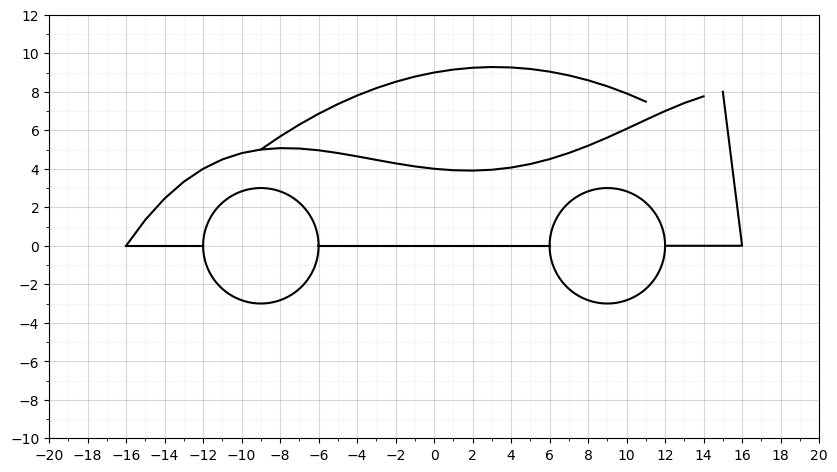

[ 4.00000000e+00 -1.01539756e-01  2.35933830e-02  1.81681469e-03
 -9.15049745e-05 -1.69181903e-06]


In [52]:
#
# Ergänzen Sie bitte hier die Python Befehle für Aufgabe 4!
#

import numpy as np



A = np.array([[1.0,-16.0,256.0,-4096.0,65536.0,-1048576.0],
              [1.0,-12.0,144.0,-1728.0,20736.0,-248832.0],
              [1.0,-9.0,81.0,-729.0,6561.0,-59049.0],
              [1.0,0.0,0.0,0.0,0.0,0.0],
              [1.0,12.0,144.0,1728.0,20736.0,248832.0],
              [1.0,15.0,225.0,3375.0,50625.0,759375.0]])


b = np.array([0.0,4.0,5.0,4.0,7.0,8.0])

keffo= np.linalg.solve(A, b)

b0, b1 ,b2 ,b3 ,b4 ,b5 = keffo

x = np.arange(-16,15,1)

y= b0 + b1*x + b2*x**2 + b3*x**3 + b4*x**4 + b5*x**5

ax.plot(x,y,'-k')

display(fig)


print(keffo)








### 4.6 Transformation
Die rot gestrichelte Grafik entsteht durch eine Rotation der ursprünglichen Grafik um den Winkel $\alpha=30^0$ im Uhrzeigersinn.
Genauer gesagt handelt es sich um eine Rotation um den Ursprung $O(0/0)$, die mathematisch durch Multiplikation mit einer Rotationsmatrix $\mathbf{R}$ beschrieben werden kann:

$$
\underbrace{
\left[
	\begin{array}{cc}
		 \cos{\alpha} & -\sin{\alpha} \\
		 \sin{\alpha} &  \cos{\alpha} \\
	\end{array}
\right]
}_{\displaystyle \mathbf{R}}
\cdot
\left[
	\begin{array}{c}
		 x\\
		 y\\
	\end{array}
\right]
=
\left[
	\begin{array}{c}
		 x \cos{\alpha} - y \sin{\alpha} \\
		 x \sin{\alpha} + y \cos{\alpha} \\
	\end{array}
\right].
$$

Dabei ist jedoch zu beachten, dass diese Matrixmultiplikation eine Rotation in mathematisch positiver Richtung, also gegen den Uhrzeigersinn, erzeugt.
Die Koordinaten der Punkte der rotierten Grafik können durch eine einzige Matrixmultiplikation berechnet werden.
Dazu fasst man alle $x$- und $y$-Koordinaten der Punkte der ursprünglichen Grafik in einer Matrix $\mathbf{XY}$ zusammen:

$$
	\mathbf{XY} =
	\left[
		\begin{array}{llllll}
			x_1 & x_2 & \ldots & \verb+np.nan+ & \ldots & x_n\\
			y_1 & y_2 & \ldots & \verb+np.nan+ & \ldots & y_n\\
		\end{array}
	\right]
	\quad \Longrightarrow \quad
	\mathbf{R} \cdot \mathbf{XY}.
$$

Um zusätzliche ungewollte Verbindungslinien zu vermeiden, kann man auch hier wieder den Trick mit `numpy.nan` verwenden.

In [54]:
IFrame('car5.png', width=600, height=330)

<div class="alert alert-block alert-danger">
    
<b>Merke</b>
    
In `numpy` können Felder durch die Funktion `concatenate()` zusammengefügt werden.
    
- https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html
    
</div>

<div class="alert alert-block alert-info">
    
### Aufgabe 5

Ergänzen Sie die Grafik durch das rotierte Fahrzeug.
</div>

In [59]:
#
# Ergänzen Sie bitte hier die Python Befehle für Aufgabe 5!
#













### 4.7 Zusatzaufgabe
Das Lösen der Zusatzaufgabe erfordert fundierte Kenntnisse im Umgang mit Python.
Die Zusatzaufgabe ist nur für diejenigen gedacht, die aus eigenem Interesse tiefer in die Materie einsteigen wollen!

In [62]:
if 'google.colab' in str(get_ipython()):
    print('IFrame() does not work with Google Colab')
else:
    display(IFrame('car.gif', width=600, height=600))

<div class="alert alert-block alert-info">
    
### Zusatzaufgabe

Erstellen Sie eine Animation, bei der die Grafik des Autos um den Ursprung in kleinen Schritten rotiert.   
</div>

In [22]:
import matplotlib.animation
from IPython.display import HTML

In [23]:
#
# Ergänzen Sie bitte hier die Python Befehle für die Zusatzaufgabe!
#





























